<h1 style="color:rgb(0,120,170)">Logistic Regression</h1>
<h2 style="color:rgb(0,120,170)">OEAW Machine Learning Summer School 2019</h2>

In [2]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt

<h3 style="color:rgb(0,120,170)"> Task 1.1 </h3>

The coefficients $\mathbf{w}$ of the Logistic Regression problem are usually estimated using the maximum likelihood method.
Assuming that the samples are drawn mutually independently from the same Bernoulli distribution (i.i.d), this leads to the optimization problem 
\begin{align*}
\min_{\mathbf{w}} L &= \min_{\mathbf{w}} \bigl( -\sum_i [ y_i \log \sigma(\mathbf{w}^T\mathbf{x}_i) + (1-y_i) \log (1-\sigma(\mathbf{w}^T \mathbf{x}_i))] \bigr) \\
\text{with} \quad \sigma(x) &= \frac{1}{1+\mathrm{e}^{-x}} 
\end{align*}
where the loss $L = -\ln \mathcal{L}$ is the negative log-likelihood. Since there is no closed-form solution for $\mathbf{w}$, an iterative method $-$ such as gradient descent $-$ must be applied in order to find $\mathbf{w}$.  
Calculate the gradient $\frac{\partial L}{\partial \mathbf{w}}$, which is needed to apply gradient descent.
Hint: $\frac{\partial \sigma(x)}{\partial x} = \sigma(x)\ (1 - \sigma(x))$.

* <span style="color:rgb(0,120,170)">**TODO:** Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 1.1:</h3>

\begin{align}
L &= -\sum_i [ y_i \log \sigma(\mathbf{w}^T \cdot \mathbf{x}_i)
+ (1-y_i) \log (1-\sigma(\mathbf{w}^T \cdot \mathbf{x}_i)) ]\\
\frac{\partial L}{\partial \mathbf{w}}
&= 
\end{align}

<h3 style="color:rgb(0,120,170)"> Task 1.2 </h3>

Implement the formula for the gradient you found in Exercise 1.1. This means: implement a function 
`logistic_gradient(w, x, y)` that takes a parameter vector
$\mathbf{w}$, a data matrix $\mathbf{X}$ and a label vector
$\mathbf{y}$ and returns the gradient $\frac{\partial L}{\partial
\mathbf{w}}$.

Test this function by implementing Gradient Checking. To do this, implement
a function `numerical_gradient(w, x, y)` that takes the same parameters
as `logistic_gradient`, but calculates the gradient numerically via the central difference quotient.

Note that the data matrix $\mathbf{X}$ has the dimension (length of input vector, number of input vectors). The summation is over the number of input vectors.

Generate a random data matrix as well as random labels and a random weight
vector and use them as input of both functions. Compare the outputs.

* <span style="color:rgb(0,120,170)">**TODO:** Markdown </span>

<h3 style="color:rgb(208,90,80)">Answer 1.2:</h3>

In [1]:
def logistic_gradient(w, x, y):
    sigma=1.0/(1.0+np.exp(-w@x))
    
    # Your code goes here
    
    return
    
def cost(w, x, y):
    sigma=1.0/(1.0+np.exp(-w@x))
    return np.sum(-y*np.log(sigma)-(1.0-y)*(np.log(1.0-sigma)))
    
def numerical_gradient(w, x, y):
    eps=1e-4
    e=np.zeros(len(w))
    dw=np.zeros(len(w))
    
    # Your code goes here
    
    return dw

In [30]:
X_random=np.random.normal(size=[10,5])
y_random=np.random.randint(2, size=[5])
w_random=np.random.normal(size=[10])
print("Logistic gradient:\n",logistic_gradient(w_random,X_random,y_random),"\n")
print("Numerical gradient:\n",numerical_gradient(w_random,X_random,y_random),"\n")
print("Difference:\n",logistic_gradient(w_random,X_random,y_random)-numerical_gradient(w_random,X_random,y_random))

Logistic gradient:
 [-0.59159409  0.17034156 -0.70879635  0.17925762  1.15541437  1.51234777
 -0.37684105 -0.91771252  1.53732007  0.70560448] 

Numerical gradient:
 [-0.59159409  0.17034156 -0.70879635  0.17925762  1.15541437  1.51234777
 -0.37684105 -0.91771252  1.53732007  0.70560448] 

Difference:
 [-8.96054786e-10  2.39442355e-11  7.16969373e-10  2.73423034e-10
 -2.41635822e-10 -2.21357599e-10 -2.36438757e-10 -3.32488481e-11
  2.58799648e-11 -2.36750952e-10]


<h3 style="color:rgb(0,120,170)"> Question 1.3 </h3>

Consider the data sets `DataSet_LR_a.csv` and `DataSet_LR_b.csv`. 
Split each of these data sets into training set and test set ($50\,\%$ each).
Then use Logistic Regression with Gradient Descent to compute classifiers on the training set and
apply them to the test samples. Use randomly initialized weights, a learning rate of $10^{-4}$, and think of a good stopping criterion.

Predict class `1` if the Logistic Regression returns $\geq 0.5$ and `0` otherwise. 
Calculate Accuracy and Balanced Accuracy on the test samples.

Further provide ROC (receiver operating characteristic) curves of the classifiers on the test samples and compute the AUC (area under curve) value of these curves. Therefore the functions `roc_curve` and `auc` from `sklearn.metrics` might be useful.


* <span style="color:rgb(0,120,170)">**TODO:** Markdown </span>

<h3 style="color:rgb(208,90,80)">Answer 1.3:</h3>


In [18]:
def fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=100000):
    w=np.random.uniform(-1,1, size=[x_train.shape[0]])
    old_cost=cost(w, x_train, y_train)
    print("Loss at beginning:",old_cost)
    for i in range(max_iter):
        # Update of the weights
        # Your update of w goes here
        current_cost=cost(w, x_train, y_train)
        if i%1000==0:
            print("Loss after {} iterations".format(i),current_cost)
        if np.abs(current_cost-old_cost) < eta: #one of several possible stopping criteria
            print("Stopped, update of loss function: "+str(np.abs(current_cost-old_cost)))
            return w
        old_cost=current_cost
    return w

def predictLogReg(w, x_pred):
    return 1.0/(1.0+np.exp(-w@x_pred))

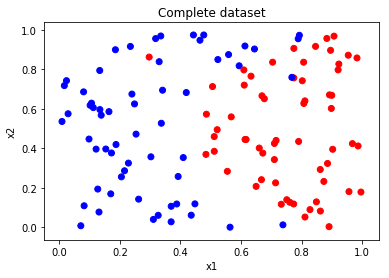

In [19]:
from sklearn.utils import shuffle
# Read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet_LR_a.csv', delimiter=',',skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
# Plot data distribution
color= ['red' if elem==1 else 'blue' for elem in y ]
plt.scatter(X[:,0], X[:,1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Complete dataset')
# Split into test and training set
X_train=X[:np.int(X.shape[0]/2)]
X_test=X[np.int(X.shape[0]/2):]
y_train=y[:np.int(len(y)/2)]
y_test=y[np.int(len(y)/2):]

In [20]:
w_learned=fitLogRegModel(X_train.T, y_train)
pred_train=predictLogReg(w_learned, X_train.T) #as a check
pred_test=predictLogReg(w_learned, X_test.T)
print("The learnt weights are: w =",w_learned)

Loss at beginning: 53.52753596796135
Loss after 0 iterations 53.499645980690026
Loss after 1000 iterations 38.93434200617046
Loss after 2000 iterations 35.04892500981816
Loss after 3000 iterations 33.16487473039604
Loss after 4000 iterations 31.849774955946778
Loss after 5000 iterations 30.82152856240184
Loss after 6000 iterations 29.989157111265424
Loss after 7000 iterations 29.304640286992615
Loss after 8000 iterations 28.73548021847444
Loss after 9000 iterations 28.257773010701374
Loss after 10000 iterations 27.853424379741266
Loss after 11000 iterations 27.508533929080265
Loss after 12000 iterations 27.212299993362222
Loss after 13000 iterations 26.956240020836887
Loss after 14000 iterations 26.73362565872879
Loss after 15000 iterations 26.539069027923013
Loss after 16000 iterations 26.368216810507967
Loss after 17000 iterations 26.217521874967286
Loss after 18000 iterations 26.084071137383496
Loss after 19000 iterations 25.965454573368092
Stopped, update of loss function: 9.998923

Text(0.5,1,'Test dataset - predictions')

<Figure size 432x288 with 0 Axes>

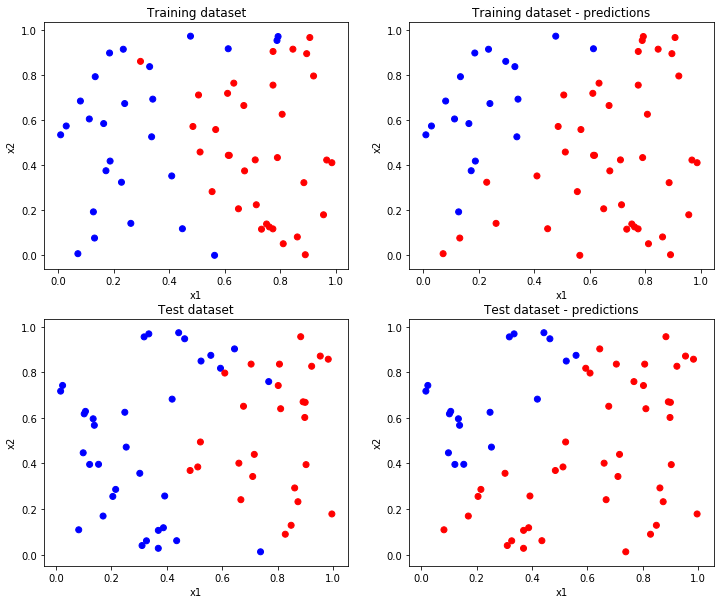

In [21]:
# Plot training and test dataset
# Plot predictions for training and test dataset

fig = plt.figure()
fig = plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
color= ['red' if elem>0.5 else 'blue' for elem in y_train ]
plt.scatter(X_train[:,0], X_train[:,1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset')

plt.subplot(2, 2, 2)
color= ['red' if elem>0.5 else 'blue' for elem in pred_train ]
plt.scatter(X_train[:,0], X_train[:,1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset - predictions')

plt.subplot(2, 2, 3)
color= ['red' if elem>0.5 else 'blue' for elem in y_test ]
plt.scatter(X_test[:,0], X_test[:,1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset')

plt.subplot(2, 2, 4)
color= ['red' if elem>0.5 else 'blue' for elem in pred_test ]
plt.scatter(X_test[:,0], X_test[:,1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset - predictions')

In [22]:
# Calculate accuracy and balanced accuracy for training set
threshold=0.5
pos_train=np.sum(y_train)
neg_train=np.sum(1-y_train)
tp_train=np.sum((np.int64(pred_train>threshold)==y_train)*y_train) #true positive
tn_train=np.sum((np.int64(pred_train>threshold)==y_train)*(1-y_train)) #true negative
fp_train=np.sum((np.int64(pred_train>threshold)!=y_train)*(1-y_train)) #false positive
fn_train=np.sum((np.int64(pred_train>threshold)!=y_train)*y_train) #false negative

train_acc=(tp_train+tn_train)/(pos_train+neg_train)
train_balanced_acc=((tp_train/pos_train)+(tn_train/neg_train))/2
print(train_acc)
print(train_balanced_acc)

0.8333333333333334
0.8122171945701357


In [23]:
# Calculate accuracy and balanced accuracy for test set
threshold=0.5
pos_test=np.sum(y_test)
neg_test=np.sum(1-y_test)
tp_test=np.sum((np.int64(pred_test>threshold)==y_test)*y_test) #true positive
tn_test=np.sum((np.int64(pred_test>threshold)==y_test)*(1-y_test)) #true negative
fp_test=np.sum((np.int64(pred_test>threshold)!=y_test)*(1-y_test)) #false positive
fn_test=np.sum((np.int64(pred_test>threshold)!=y_test)*y_test) #false negative

test_acc=(tp_test+tn_test)/(pos_test+neg_test)
test_balanced_acc=((tp_test/pos_test)+(tn_test/neg_test))/2
print(test_acc)
print(test_balanced_acc)

0.7333333333333333
0.7647058823529411


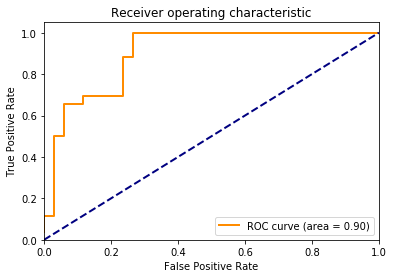

In [24]:
fpr, tpr, _=roc_curve(y_test, pred_test) 
rocAUC=auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % rocAUC)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()